# Sample Coding to Extract and Analysis of NHANES data using  PIC-SURE API in R

## Introduction

The goal of this study is to represent a sample case study on how to conncet to API and have access to NHANES dataset from I2B2 trasmart. NHANES dataset is a resource of health and neutritional status of adults and children in United states. Its composed of some questionnaire and physical examination information. 

Hypertension is one of the major concern in US. Since its a major contributor to other diseases like heart failure, kidney disease, diabetes and etc. Therefore, in this study, the association between hypertension and some socio-economic factors are studied.


## Steps to perform the study

1. Connecting to BD2K PIC-SURE API using URL and the  API key
2. Finding the path of each selected parameters
3. Run the query and get the data in JSON format
4. convert the data from JSON into CSV format
5. Perform the rest of the analysis

To this aim, the Rcupcake packages has been installed and used to get connected to API and get access to data. Therefore, the following libraries have been installed.


## Connecting to BD2K PIC-SURE API using  API key

The following function is used connect to API. The result will show the status of connection. If the result shows "success", the connection has been made.

In [2]:
## Load Required Libraries
paket <- function(pak){
  new_pak <- pak[!(pak %in% rownames(installed.packages()))]
  if (length(new_pak)) 
    install.packages(new_pak, dependencies = TRUE,repos="https://cloud.r-project.org/")
  sapply(pak, library, character.only = TRUE)
}

listOfPackages <- c("data.table","xml2","httr","readr","devtools","knitr","Rcupcake" ,"ggplot2")
## Add the libraries you need here 
paket(listOfPackages)


Loading required package: stringr


$data.table
[1] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[6] "datasets"   "methods"    "base"      

$xml2
[1] "xml2"       "data.table" "stats"      "graphics"   "grDevices" 
[6] "utils"      "datasets"   "methods"    "base"      

$httr
 [1] "httr"       "xml2"       "data.table" "stats"      "graphics"  
 [6] "grDevices"  "utils"      "datasets"   "methods"    "base"      

$readr
 [1] "readr"      "httr"       "xml2"       "data.table" "stats"     
 [6] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[11] "base"      

$devtools
 [1] "devtools"   "readr"      "httr"       "xml2"       "data.table"
 [6] "stats"      "graphics"   "grDevices"  "utils"      "datasets"  
[11] "methods"    "base"      

$knitr
 [1] "knitr"      "devtools"   "readr"      "httr"       "xml2"      
 [6] "data.table" "stats"      "graphics"   "grDevices"  "utils"     
[11] "datasets"   "methods"    "base"      

$Rcupcake
 [1] "Rcupcake"   "stringr"    "knitr"      "devtools"   "readr"     
 [6] "httr"       "xml2"       "data.table" "stats"      "graphics"  
[11] "grDevices"  "utils"      "datasets"   "methods"    "base"      

$ggplot2
 [1] "ggplot2"    "Rcupcake"   "stringr"    "knitr"      "devtools"  
 [6] "readr"      "httr"       "xml2"       "data.table" "stats"     
[11] "graphics"   "grDevices"  "utils"      "datasets"   "methods"   
[16] "base"

In [10]:
access=function(URL,KEY){
    link=paste(URL,"/rest/v1/securityService/startSession?key=",sep="",KEY)
    connection=content(GET(link))
    connection
    return(connection)}

In [11]:
URL="https://nhanes.hms.harvard.edu"
KEY="##########################" #API key
startSession=access(URL,KEY)
startSession

$status
[1] "success"

## Running the Queries 

After connecting to API, the **get.children** function of **Rcupcake** package has been used to retrieve the path of each selected variables. The input of this function would be the SSC url and the path of each variable. In this study, the demographics, ssc commonly used and medhx_gastointestinal have been selected as the roots for the variables under the study.

In [12]:
att1 <- get.children( 
   url         = "https://nhanes.hms.harvard.edu/", 
   fieldname   = "/nhanes/Demo/questionnaire/demographics/"
  )

att2<-get.children( 
   url         = "https://nhanes.hms.harvard.edu/", 
   fieldname   = "/nhanes/Demo/questionnaire/examination/blood pressure/"
  )
att3<-get.children( 
   url         = "https://nhanes.hms.harvard.edu/", 
  fieldname   = "/nhanes/Demo/questionnaire/questionnaire/disease/"
  )

 att4<-get.children( 
  url         = "https://nhanes.hms.harvard.edu/", 
  fieldname   = "/nhanes/Demo/questionnaire/questionnaire/smoking behavior/"
  )

att5<-get.children( 
  url         = "https://nhanes.hms.harvard.edu/", 
  fieldname   = "/nhanes/Demo/questionnaire/questionnaire/physical fitness/"
  )

In [13]:
NhanesTable=c(att1,att2,att3,att4,att5)

In [14]:
head(NhanesTable)

[1] "/nhanes/Demo/questionnaire/demographics/AGE/"      
[2] "/nhanes/Demo/questionnaire/demographics/area/"     
[3] "/nhanes/Demo/questionnaire/demographics/DMDBORN/"  
[4] "/nhanes/Demo/questionnaire/demographics/DMDMARTL/" 
[5] "/nhanes/Demo/questionnaire/demographics/education/"
[6] "/nhanes/Demo/questionnaire/demographics/INDFMPIR/"

After retrieving the path for each feature, the **my.query** function in **Rcupcake** package is used to create the JSON query. To this aim, the selected variablels such as AGE, SEX, Race, SES_level are placed under demographics. While, some other information such as smoking status, physical activity, diabetes are placed under questionnaire parts. The output of this study would be the **mean systolic** level of blood pressure that can be used as an index for having hypertension. 

It should be noted that the **first eleman** in myfields vector is reffered to the **where** clause of query.

In [15]:
queryExample <- my.query( myfields  = "mean systolic|Current Cigarette Smoker?|Physical Activity|Any Diabetes?|SES_LEVEL|SEX|AGE|RACE", 
                          myvector  = NhanesTable, 
                          url       = "https://nhanes.hms.harvard.edu/"
              )
queryExample

{
  "select": [
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/demographics/AGE/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/demographics/AGE/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/demographics/RACE/black/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/demographics/RACE/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/demographics/RACE/mexican/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/demographics/RACE/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/demographics/RACE/other/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/demographics/RACE/"
    },
    {
      "field": {
        "pui": "/nhanes/Demo/questionnaire/demographics/RACE/other_hispanic/",
        "dataType": "string"
      },
      "alias": "/nhanes/Demo/questionnaire/dem

## Transfering the Data from JSON to CSV format

After retreival of JSON queries, they need to be converted in to CSV format for further analysis. To this aim, the **my.data** function of Rcupcake package has been used to transfer the **JSON** file into **CSV** format. The input of this function is composed of the JSON query, the URL link and the desired format which is CSV in this case and also the name of the file that the data is transformed and stored.

In [16]:
query <- my.data( 
  query          = queryExample,
  url            = "https://nhanes.hms.harvard.edu/", 
  responseFormat = "CSV", 
  outputPath     = "./datann.txt")


No encoding supplied: defaulting to UTF-8.


In [17]:
head(query)

,patient_id,X.nhanes.Demo.questionnaire.questionnaire.smoking.behavior.Current.Cigarette.Smoker..,X.nhanes.Demo.questionnaire.questionnaire.disease.Any.Diabetes..FBG....126.mg.per.dL.or.self.report..,X.nhanes.Demo.questionnaire.demographics.RACE.,X.nhanes.Demo.questionnaire.questionnaire.physical.fitness.Physical.Activity..MET.based.rank..,X.nhanes.Demo.questionnaire.demographics.SEX.,X.nhanes.Demo.questionnaire.examination.blood.pressure.mean.systolic.,X.nhanes.Demo.questionnaire.demographics.AGE.,X.nhanes.Demo.questionnaire.demographics.SES_LEVEL.
1,4,,No,mexican,3,female,118,49,NA
2,5,,No,mexican,NA,male,96,18,0
3,8,,No,mexican,2,female,106,40,0
4,9,Yes,No,white,NA,male,131.33333,52,1
5,11,,No,black,2,female,115.33333,17,0
6,12,No,No,white,3,female,129.33333,71,2


## Analysis the Data

As its mentioned before, the association between hypertension and some socio-econimic fectors is examined in this study. To this aim, first the records that are having NA values are removed from the table. The result shows the 7,308 unique patients. 
In order to find the hypertenstion status of each patients, their SBP level was compared with the JNC standard. For the ones that have SBP average higher than 140, they were recognized as Hypertension=1 and vise versa. 


In [18]:
names(query)[2]="Smoking"
names(query)[3]="Diabetes"
names(query)[4]="Race"
names(query)[5]="PhysicalActivity"
names(query)[6]="SEX"
names(query)[7]="SBP"
names(query)[8]="AGE"
names(query)[9]="Socioeconomic Level"


In [21]:
c=vector()
for(i in 1:ncol(query)){c[i]=sum(is.na(query[,i]))}
query[apply(query, 2, function(x) x=="")] = NA
Q2=na.omit(query)
Q2$SBP=ifelse(Q2$SBP>=140,1,0)

str(Q2)
Q2=Q2[,c(1,7,2,3,4,5,6,8,9)]
length(unique(Q2$patient))
head(Q2)

'data.frame':	7380 obs. of  9 variables:
 $ patient_id         : int  12 14 16 17 18 22 27 34 36 39 ...
 $ Smoking            : Factor w/ 3 levels "","No","Yes": 2 3 2 3 3 3 3 3 3 2 ...
 $ Diabetes           : Factor w/ 3 levels "","No","Yes": 2 2 2 2 2 2 2 2 3 2 ...
 $ Race               : Factor w/ 5 levels "black","mexican",..: 5 1 1 1 2 2 2 3 5 5 ...
 $ PhysicalActivity   : int  3 2 1 1 1 1 0 1 2 2 ...
 $ SEX                : Factor w/ 2 levels "female","male": 1 1 1 1 2 2 2 2 2 1 ...
 $ SBP                : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AGE                : int  71 32 25 30 40 20 62 49 50 80 ...
 $ Socioeconomic Level: int  2 0 0 0 0 1 0 0 2 0 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:18656] 1 2 3 4 5 11 13 14 15 17 ...
  .. ..- attr(*, "names")= chr [1:18656] "1" "2" "3" "4" ...


[1] 7380

,patient_id,SBP,Smoking,Diabetes,Race,PhysicalActivity,SEX,AGE,Socioeconomic Level
6,12,0,No,No,white,3,female,71,2
7,14,0,Yes,No,black,2,female,32,0
8,16,0,No,No,black,1,female,25,0
9,17,0,Yes,No,black,1,female,30,0
10,18,0,Yes,No,mexican,1,male,40,0
12,22,0,Yes,No,mexican,1,male,20,1


## Visualization

In this section the analysis of demographic variables ( sex, age and race) has been done by using the pie chart and bar chart. the other way of doing this analysis is also to apply Rcupcake demographic.summary function.
As it can be seen from the graphs, for the gender distribution, the male records are more than the female. Moreover, the patients are more distributed between the age 25-55. 
More than half of the patients are having white race.

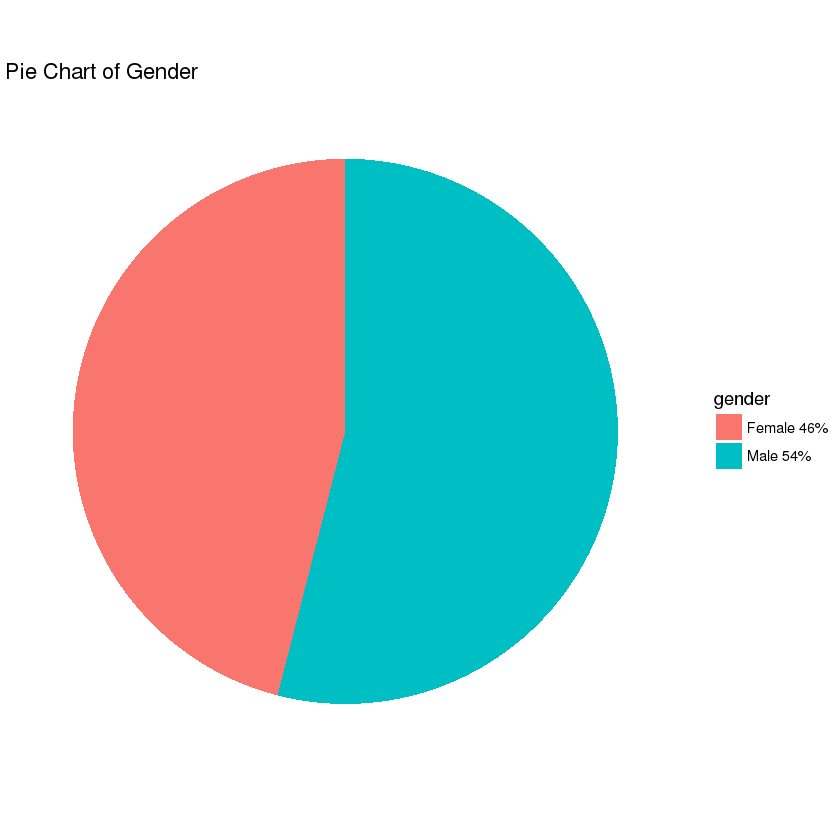

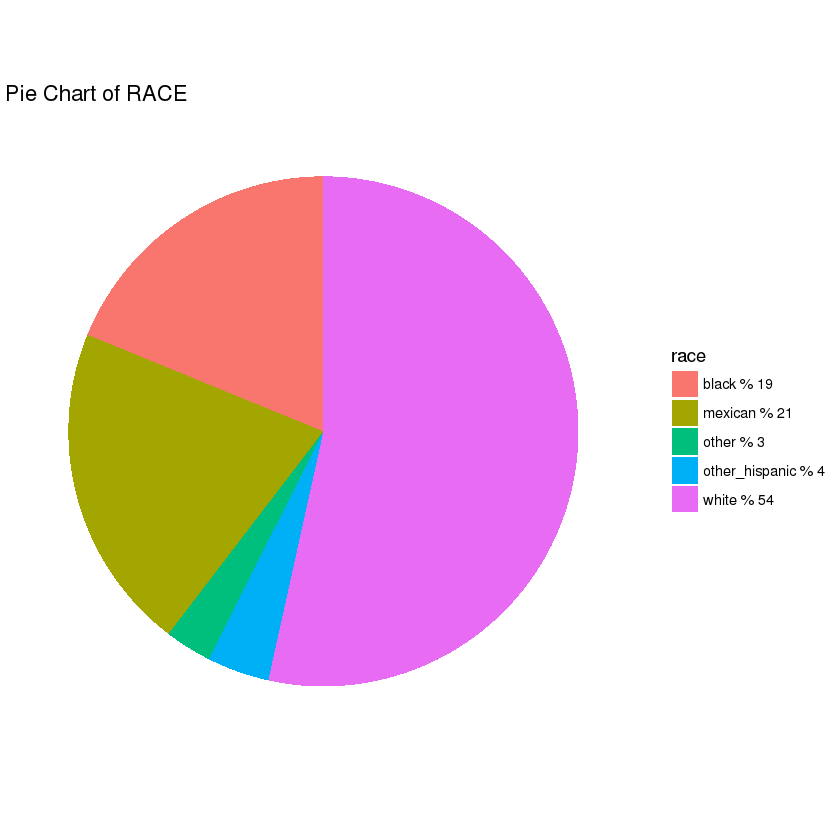

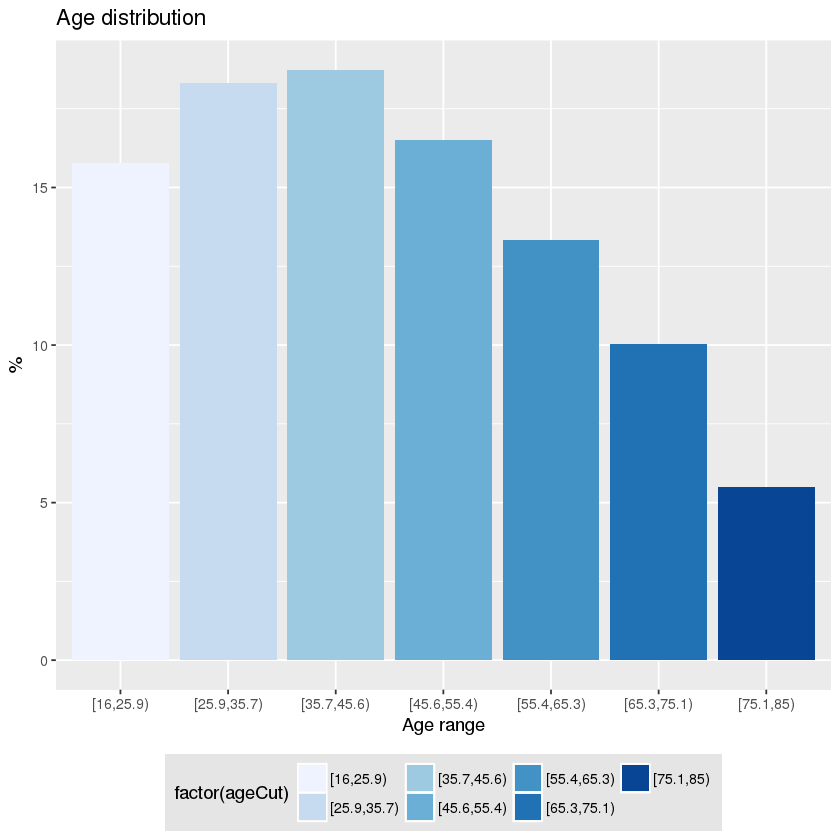

In [22]:
gender<-data.frame(plyr::count(Q2$SEX))
slices <- c(gender[1,2],gender[2,2])
lbls <- c("Female", "Male")

pct <- round(slices/sum(slices)*100)
lbls <- paste(lbls, pct) # add percents to labels
gender <- paste(lbls,"%",sep="") # ad % to labels

df=data.frame(lbls,pct)
bp<-ggplot(df,aes(x="",y=pct, fill=gender))+ geom_bar(width=1,stat="identity")+labs(title="Pie Chart of Gender")
pie<-bp+coord_polar(theta="y")+theme_void()
pie
    




race<-data.frame(plyr::count(Q2$Race))
lbls <- race[,1]
pct=vector()
for(i in 1:nrow(race)){pct[i]=round((race[i,2]/sum(race[,2]))*100)}

# lbls <-race[,1] # add percents to labels
race <- paste(lbls,"%",sep=" ",pct) # ad % to labels

df=data.frame(lbls,pct)
bp<-ggplot(df,aes(x="",y=pct, fill=race))+ geom_bar(width=1,stat="identity")+labs(title="Pie Chart of RACE")
pie<-bp+coord_polar(theta="y")+theme_void()
pie
    



    
o=as.vector(range(Q2$AGE)) 
step=round(o[2]-o[1])/7
    
rsl <- data.frame(range=unlist(lapply(seq(o[1], o[2], step), function(x){ rep(paste0(x, "-", x+step)) })))
breaks <- seq(o[1], o[2], by=step)
ageCut <- cut( Q2$AGE, breaks, right = FALSE)
ageFreq <- table(ageCut)
ageFreqRel <- as.data.frame((ageFreq/nrow(Q2))*100)
ageFreqRel$Freq <- round( ageFreqRel$Freq, 2)

axis.x <- as.character(ageFreqRel$range)
axis.x <- factor(as.character(ageFreqRel$ageCut), levels=unique(ageFreqRel$ageCut), ordered=TRUE)

p <- ggplot(ageFreqRel, aes(x= axis.x, Freq, fill = factor(ageCut))) + geom_bar(position = "dodge", , stat = "identity") +  scale_fill_brewer(palette="Blues") +
  labs(x = "Age range", y = "%", title = "Age distribution") +
  theme(legend.background = element_rect(fill="gray90", size=.5, linetype="dotted"), legend.position="bottom")
p
  